In [11]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans

In [4]:
image_path = '../output_videos/cropped_img.jpg'
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)


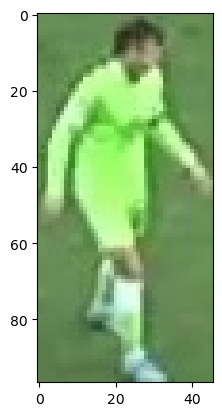

In [6]:
plt.imshow(image)
plt.show()

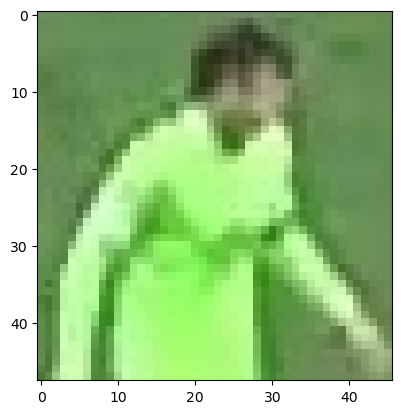

In [9]:
# take top half of image
top_half_img = image[0: int(image.shape[0]/2), :]
plt.imshow(top_half_img)
plt.show()

# cluster image into 2 clusters 

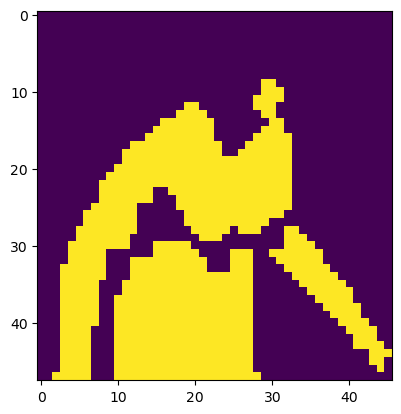

In [15]:
# reshape image into 2d array
image_2d = top_half_img.reshape(-1, 3)

# performs kmeans clustering w 2 clusters 
kmeans = KMeans(n_clusters=2, random_state=0).fit(image_2d)
kmeans.fit(image_2d)

# get the cluster labels
lables = kmeans.labels_

# reshape labels into original img shape
clustered_image = lables.reshape(top_half_img.shape[0], top_half_img.shape[1])
# display clustered img
plt.imshow(clustered_image)
plt.show()

In [16]:
corner_clusters = [clustered_image[0, 0], clustered_image[0, -1], clustered_image[-1, 0], clustered_image[-1, -1]]
non_player_cluster = max(set(corner_clusters), key=corner_clusters.count)
print(non_player_cluster)

0


In [17]:
player_cluster = 1+non_player_cluster
print(player_cluster)

1


In [18]:
kmeans.cluster_centers_[player_cluster]

array([175.1083871 , 242.39483871, 139.51741935])